# Single Transducer Control Experiment with Laser

10 cycles:

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myfft import myfft
exec(open('ComputeDelays.py').read())

s2_50=timedata('s2_50')
readlabdat('jan17_8.csv',s2_50)
s2_100=timedata('s2_100')
readlabdat('jan17_9.csv',s2_100)
s2_200=timedata('s2_200')
readlabdat('jan17_10.csv',s2_200)

s1_50=timedata('s1_50')
readlabdat('jan17_19.csv',s1_50)
s1_100=timedata('s1_100')
readlabdat('jan17_11.csv',s1_100)
s1_200=timedata('s1_200')
readlabdat('jan17_12.csv',s1_200)

pu1_50=timedata('pu1_50')
readlabdat('jan17_13.csv',pu1_50)
pu1_100=timedata('pu1_100')
readlabdat('jan17_14.csv',pu1_100)
pu1_200=timedata('pu1_200')
readlabdat('jan17_15.csv',pu1_200)

pu2_50=timedata('pu2_50')
readlabdat('jan17_16.csv',pu2_50)
pu2_100=timedata('pu2_100')
readlabdat('jan17_17.csv',pu2_100)
pu2_200=timedata('pu2_200')
readlabdat('jan17_18.csv',pu2_200)

In [65]:
pu1_50=timedata('pu1_50')
readlabdat('jan17_13.csv',pu1_50)
pu1_100=timedata('pu1_100')
readlabdat('jan17_5.csv',pu1_100)
pu1_200=timedata('pu1_200')
readlabdat('jan17_6.csv',pu1_200)

pu2_50=timedata('pu2_50')
readlabdat('jan17_1.csv',pu2_50)
pu2_100=timedata('pu2_100')
readlabdat('jan17_2.csv',pu2_100)
pu2_200=timedata('pu2_200')
readlabdat('jan17_3.csv',pu2_200)

In [66]:
f_s1_50,FT_s1_50=myfft(s1_50.time,s1_50.data)
f_s1_100,FT_s1_100=myfft(s1_100.time,s1_100.data)
f_s1_200,FT_s1_200=myfft(s1_200.time,s1_200.data)

f_s2_50,FT_s2_50=myfft(s2_50.time,s2_50.data)
f_s2_100,FT_s2_100=myfft(s2_100.time,s2_100.data)
f_s2_200,FT_s2_200=myfft(s2_200.time,s2_200.data)

f_pu1_50,FT_pu1_50=myfft(pu1_50.time,pu1_50.data)
f_pu1_100,FT_pu1_100=myfft(pu1_100.time,pu1_100.data)
f_pu1_200,FT_pu1_200=myfft(pu1_200.time,pu1_200.data)

f_pu2_50,FT_pu2_50=myfft(pu2_50.time,pu2_50.data)
f_pu2_100,FT_pu2_100=myfft(pu2_100.time,pu2_100.data)
f_pu2_200,FT_pu2_200=myfft(pu2_200.time,pu2_200.data)

In [67]:
import peakutils
from peakutils import indexes, peak

def gaussian(x, amplitude, mean, stddev):
    y = amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

def FWHM(x,y):
    
    fits = peakutils.peak.gaussian_fit(x, y, center_only=False)
    x_new = np.linspace(x[0],x[-1],100)
    gaus_y = gaussian(x_new,fits[0], fits[1], fits[2])
    
    # Find the indices of the peaks
    peak_indices = indexes(gaus_y, thres=0.5, min_dist=1)

    # Get the index of the highest peak
    max_index = peak_indices[np.argmax(gaus_y[peak_indices])]

    # Calculate the FWHM
    half_max = gaus_y[max_index] / 2.0
    left_index = np.argmin(np.abs(gaus_y[:max_index] - half_max))
    right_index = np.argmin(np.abs(gaus_y[max_index:] - half_max)) + max_index
    fwhm = x_new[right_index] - x_new[left_index]
    
    # Find central frequency from peak index:
    central_freq = x_new[max_index]

    print("Peak Index:", max_index)
    print("Central Frequency:", central_freq)
    print("FWHM:", fwhm)
    print("")
    return x_new,gaus_y, max_index, central_freq, fwhm

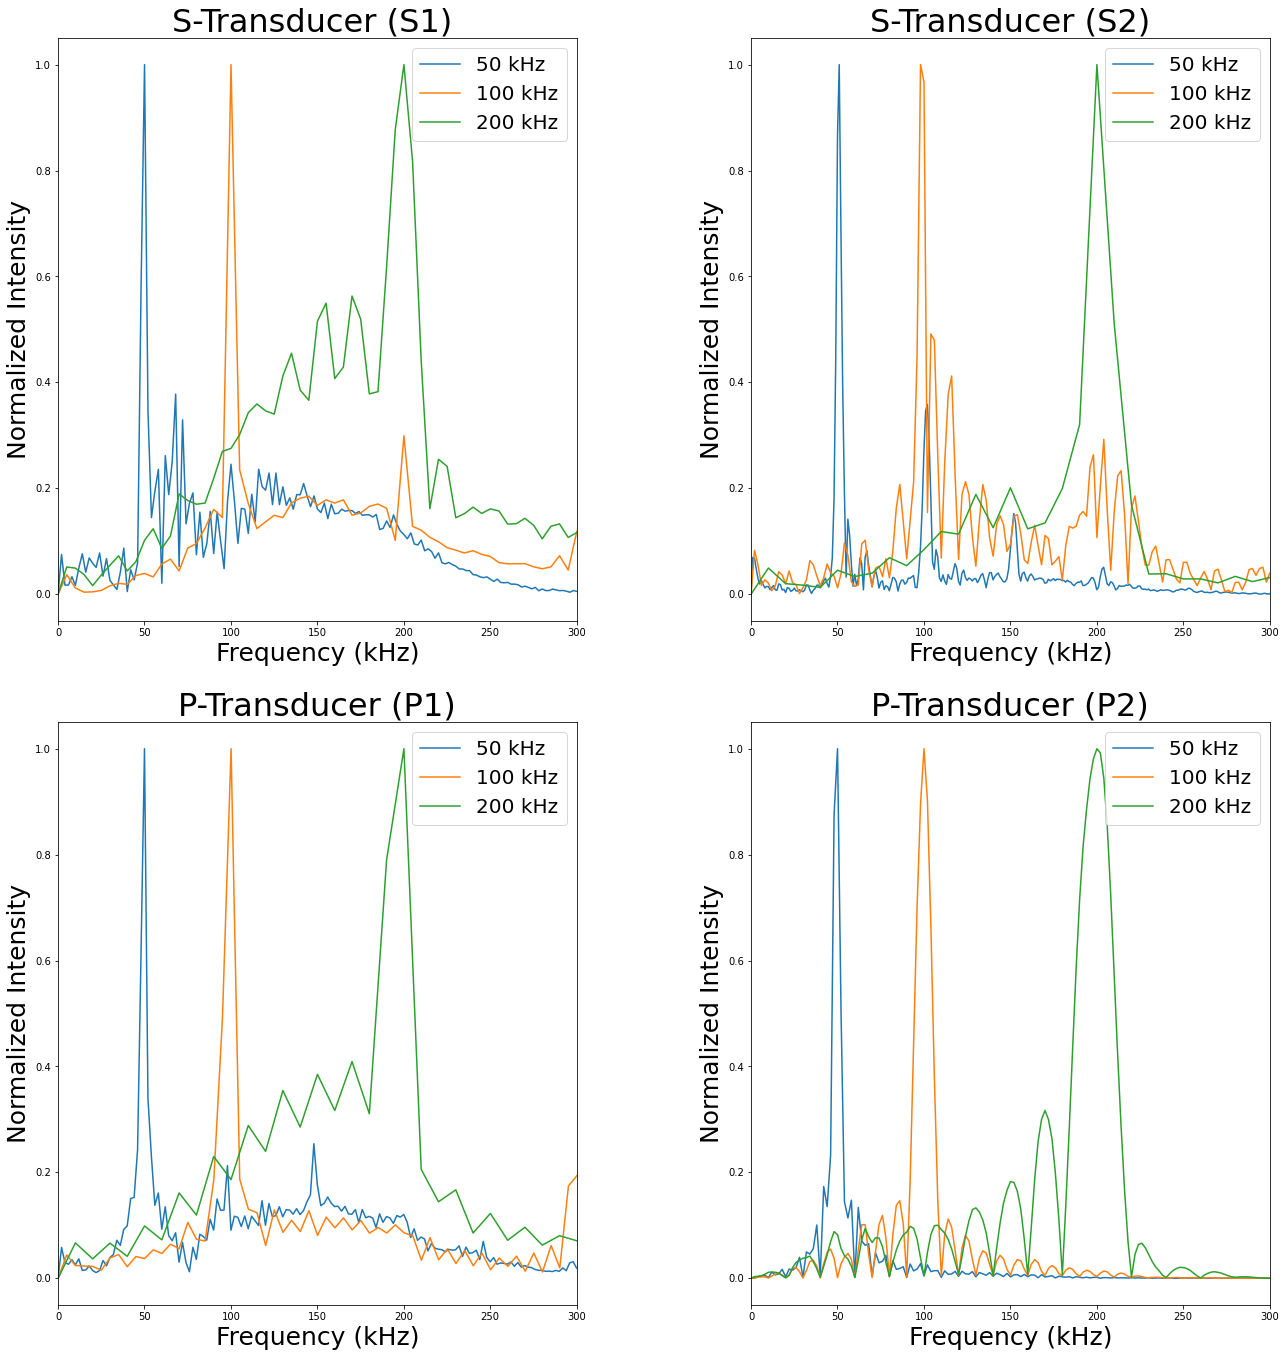

In [5]:
fig, axs = plt.subplots(2,2, figsize=(10, 15))

plt.rcParams['font.size'] = '25'

axs[0,0].plot(f_s1_50,np.abs(FT_s1_50)/max(np.abs(FT_s1_50)),label='50 kHz')
axs[0,0].plot(f_s1_100,np.abs(FT_s1_100)/max(np.abs(FT_s1_100)),label='100 kHz')
axs[0,0].plot(f_s1_200,np.abs(FT_s1_200)/max(np.abs(FT_s1_200)),label='200 kHz')
axs[0,0].set_title('S-Transducer (S1) ',fontsize=15)
axs[0,0].set_xlim([0,300])
axs[0,0].legend(fontsize="20",loc=1)

axs[0,1].plot(f_s2_50,np.abs(FT_s2_50)/max(np.abs(FT_s2_50)),label='50 kHz')
axs[0,1].plot(f_s2_100,np.abs(FT_s2_100)/max(np.abs(FT_s2_100)),label='100 kHz')
axs[0,1].plot(f_s2_200,np.abs(FT_s2_200)/max(np.abs(FT_s2_200)),label='200 kHz')
axs[0,1].set_title('S-Transducer (S2)',fontsize=15)
axs[0,1].set_xlim([0,300])
axs[0,1].legend(fontsize="20",loc=1)

axs[1,0].plot(f_pu1_50,np.abs(FT_pu1_50)/max(np.abs(FT_pu1_50)),label='50 kHz')
axs[1,0].plot(f_pu1_100,np.abs(FT_pu1_100)/max(np.abs(FT_pu1_100)),label='100 kHz')
axs[1,0].plot(f_pu1_200,np.abs(FT_pu1_200)/max(np.abs(FT_pu1_200)),label='200 kHz')
axs[1,0].set_title('P-Transducer (P1)',fontsize=15)
axs[1,0].set_xlim([0,300])
axs[1,0].legend(fontsize="20",loc=1)

axs[1,1].plot(f_pu2_50,np.abs(FT_pu2_50)/max(np.abs(FT_pu2_50)),label='50 kHz')
axs[1,1].plot(f_pu2_100,np.abs(FT_pu2_100)/max(np.abs(FT_pu2_100)),label='100 kHz')
axs[1,1].plot(f_pu2_200,np.abs(FT_pu2_200)/max(np.abs(FT_pu2_200)),label='200 kHz')
axs[1,1].set_title('P-Transducer (P2)',fontsize=15)
axs[1,1].set_xlim([0,300])
axs[1,1].legend(fontsize="20",loc=1)

for ax in axs.flat:
    ax.set(xlabel='Frequency (kHz)',ylabel='Normalized Intensity')
    
    ax.title.set_fontsize(32)
    ax.xaxis.label.set_fontsize(25)
    ax.yaxis.label.set_fontsize(25)
    map(lambda p: p.set_fontsize(25), ax.get_xticklabels())
    map(lambda p: p.set_fontsize(25), ax.get_yticklabels())


fig.tight_layout(pad=0.1, w_pad=0.2,h_pad=0.2)
fig.tight_layout(w_pad=2)
fig.tight_layout(h_pad=0.005)
#fig.tight_layout()
fig.set_size_inches(20.0,20.0)
fig.savefig('Figures/Laser_SingleTrans_Plot.jpeg', dpi=400)

In [6]:
# Frequency at peak (Hz):
print(f_s1_50[np.argmax(np.abs(FT_s1_50))])
print(f_s1_100[np.argmax(np.abs(FT_s1_100))])
print(f_s1_200[np.argmax(np.abs(FT_s1_200))])
print("")
print(f_s2_50[np.argmax(np.abs(FT_s2_50))])
print(f_s2_100[np.argmax(np.abs(FT_s2_100))])
print(f_s2_200[np.argmax(np.abs(FT_s2_200))])
print("")
print(f_pu2_50[np.argmax(np.abs(FT_pu2_50))])
print(f_pu2_100[np.argmax(np.abs(FT_pu2_100))])
print(f_pu2_200[np.argmax(np.abs(FT_pu2_200))])
print("")
print(f_pu1_50[np.argmax(np.abs(FT_pu1_50))])
print(f_pu1_100[np.argmax(np.abs(FT_pu1_100))])
print(f_pu1_200[np.argmax(np.abs(FT_pu1_200))])



-50.02501250625734
100.05002501250382
-200.10005002500765

50.999999999998764
-98.04902451225377
-200.10005002500765

-50.025012506251926
100.05002501250385
-200.1000500250077

-50.00000000000013
100.10010010009765
-200.10005002500765


In [7]:
print(f_s1_50[2]-f_s1_50[1])
print(f_s1_100[2]-f_s1_100[1])
print(f_s1_200[2]-f_s1_200[1])
print("")
print(f_s2_50[2]-f_s2_50[1])
print(f_s2_100[2]-f_s2_100[1])
print(f_s2_200[2]-f_s2_200[1])
print("")
print(f_pu2_50[2]-f_pu2_50[1])
print(f_pu2_100[2]-f_pu2_100[1])
print(f_pu2_200[2]-f_pu2_200[1])
print("")
print(f_pu1_50[2]-f_pu1_50[1])
print(f_pu1_100[2]-f_pu1_100[1])
print(f_pu1_200[2]-f_pu1_200[1])

2.001000500250484
5.002501250624846
5.002501250624846

1.0
2.001000500249802
10.005002501249692

2.001000500249802
2.001000500249802
2.001000500249802

2.0
5.005005005004932
10.005002501249692


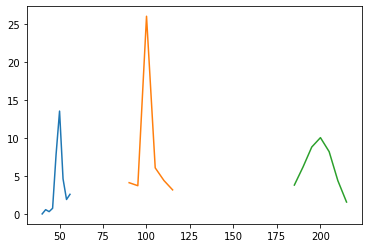

In [123]:
plt.plot(f_s1_50[1019:1028],np.abs(FT_s1_50[1019:1028]),label='50 kHz')
plt.plot(f_s1_100[1017:1023],np.abs(FT_s1_100[1017:1023]),label='100 kHz')
plt.plot(f_s1_200[1036:1043],np.abs(FT_s1_200[1036:1043]),label='200 kHz')

In [124]:
print('50kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_s1_50[1019:1028],np.abs(FT_s1_50[1019:1028])/max(np.abs(FT_s1_50[1019:1028])))
print('100kHz')
x2,gaus2,index2, central2, fwhm1 = FWHM(f_s1_100[1017:1023],np.abs(FT_s1_100[1017:1023])/max(np.abs(FT_s1_100[1017:1023])))
print('200 kHz')
x3,gaus3,index3, central3, fwhm1 = FWHM(f_s1_200[1036:1043],np.abs(FT_s1_200[1036:1043])/max(np.abs(FT_s1_200[1036:1043])))

50kHz
Peak Index: 60
Central Frequency: 49.72183061228002
FWHM: 3.8807282429096617

100kHz
Peak Index: 41
Central Frequency: 100.403737222144
FWHM: 6.568941036174493

200 kHz
Peak Index: 45
Central Frequency: 198.73573150210984
FWHM: 21.829096366364496



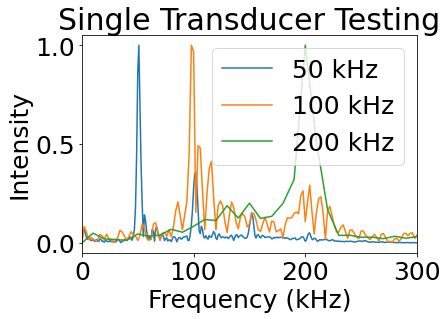

In [8]:
plt.plot(f_s2_50,np.abs(FT_s2_50)/max(np.abs(FT_s2_50)),label='50 kHz')
plt.plot(f_s2_100,np.abs(FT_s2_100)/max(np.abs(FT_s2_100)),label='100 kHz')
plt.plot(f_s2_200,np.abs(FT_s2_200)/max(np.abs(FT_s2_200)),label='200 kHz')
plt.title('Single Transducer Testing')
# S2, 10 cycles
plt.xlabel("Frequency (kHz)")
plt.ylabel("Intensity")
plt.xlim([0,300])
plt.legend()
plt.savefig('Figures/Laser_SingleTrans_S2.jpeg', dpi=300)

1 cycle:

In [18]:
S1_50=timedata('S1_50')
readlabdat('apr1023_3.csv',S1_50)
S1_100=timedata('S1_100')
readlabdat('apr1023_4.csv',S1_100)
S1_150=timedata('S1_150')
readlabdat('apr1023_7.csv',S1_150)
S1_200=timedata('S1_200')
readlabdat('apr1023_8.csv',S1_200)

f_S1_50c,FT_S1_50c=myfft(S1_50.time[300:800],S1_50.data[300:800])
f_S1_100c,FT_S1_100c=myfft(S1_100.time[300:800],S1_100.data[300:800])
f_S1_150c,FT_S1_150c=myfft(S1_150.time[250:700],S1_150.data[250:700])
f_S1_200c,FT_S1_200c=myfft(S1_200.time[400:650],S1_200.data[400:650])
f_S1_200b,FT_S1_200b=myfft(S1_200.time,S1_200.data)

In [126]:
f_S1_50c,FT_S1_50c=myfft(S1_50.time[298:818],S1_50.data[298:818])
f_S1_100c,FT_S1_100c=myfft(S1_100.time[298:818],S1_100.data[298:818])
f_S1_150c,FT_S1_150c=myfft(S1_150.time[298:818],S1_150.data[298:818])
f_S1_200c,FT_S1_200c=myfft(S1_200.time[298:818],S1_200.data[298:818])
f_S1_200b,FT_S1_200b=myfft(S1_200.time,S1_200.data)

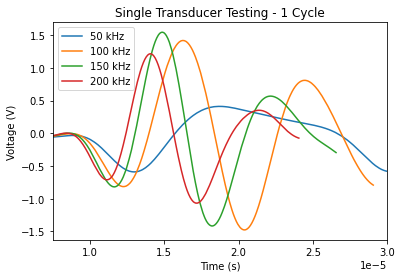

In [127]:
plt.rcParams['font.size'] = '10'
plt.plot(S1_50.time[300:850],S1_50.data[300:850], label="50 kHz")
plt.plot(S1_100.time[300:800],S1_100.data[300:800], label="100 kHz")
plt.plot(S1_150.time[300:750],S1_150.data[300:750], label="150 kHz")
plt.plot(S1_200.time[300:700],S1_200.data[300:700], label="200 kHz")
plt.legend()
plt.xlim([0.75e-5,3e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title('Single Transducer Testing - 1 Cycle')
plt.savefig('Figures/Laser_SingleTrans_S1_1cycle.jpeg', dpi=300)

In [12]:
S1_200.time[298]


4e-06

In [13]:
S1_200.time[818]

3e-05

Text(0.5, 0, 'Frequency (kHz)')

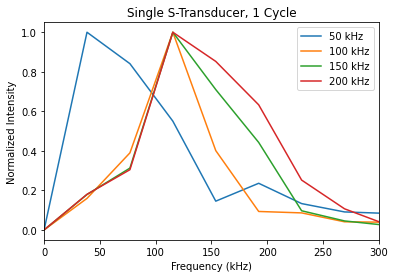

In [134]:
plt.plot(f_S1_50c,np.abs(FT_S1_50c)/max(np.abs(FT_S1_50c)),label='50 kHz')
plt.plot(f_S1_100c,np.abs(FT_S1_100c)/max(np.abs(FT_S1_100c)),label='100 kHz')
plt.plot(f_S1_150c,np.abs(FT_S1_150c)/max(np.abs(FT_S1_150c)),label='150 kHz')
plt.plot(f_S1_200c,np.abs(FT_S1_200c)/max(np.abs(FT_S1_200c)),label='200 kHz')
#plt.plot(f_S1_200b,np.abs(FT_S1_200b)/max(np.abs(FT_S1_200b)),label='200b kHz')
plt.title('Single S-Transducer, 1 Cycle')
plt.xlim([0,300])
plt.legend()
plt.ylabel("Normalized Intensity")
plt.xlabel("Frequency (kHz)")
#plt.savefig('Figures/Laser_SingleTrans_S1_1cycleFFT.jpeg', dpi=300)

Text(0.5, 0, 'Frequency (kHz)')

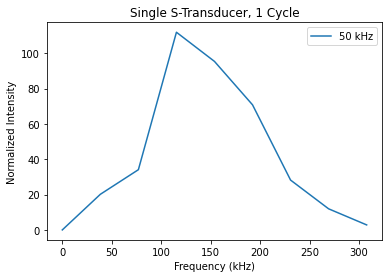

In [177]:
plt.plot(f_S1_200c[260:269],np.abs(FT_S1_200c[260:269]),label='50 kHz')
#plt.plot(f_S1_100c,np.abs(FT_S1_100c)/max(np.abs(FT_S1_100c)),label='100 kHz')
#plt.plot(f_S1_150c,np.abs(FT_S1_150c)/max(np.abs(FT_S1_150c)),label='150 kHz')
#plt.plot(f_S1_200c,np.abs(FT_S1_200c)/max(np.abs(FT_S1_200c)),label='200 kHz')
#plt.plot(f_S1_200b,np.abs(FT_S1_200b)/max(np.abs(FT_S1_200b)),label='200b kHz')
plt.title('Single S-Transducer, 1 Cycle')
#plt.xlim([0,300])
plt.legend()
plt.ylabel("Normalized Intensity")
plt.xlabel("Frequency (kHz)")

In [156]:
len(f_S1_50c)

520

In [178]:
print('50kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S1_50c[260:265],np.abs(FT_S1_50c[260:265])/max(np.abs(FT_S1_50c[260:265])))
print('100kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f_S1_100c[262:265],np.abs(FT_S1_100c[262:265])/max(np.abs(FT_S1_100c[262:265])))
print('150kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f_S1_150c[262:267],np.abs(FT_S1_150c[262:267])/max(np.abs(FT_S1_150c[262:267])))
print('200 kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f_S1_200c[261:268],np.abs(FT_S1_200c[261:268])/max(np.abs(FT_S1_200c[261:268])))

50kHz
Peak Index: 43
Central Frequency: 66.82206682206746
FWHM: 91.68609168609257

100kHz
Peak Index: 50
Central Frequency: 115.77311577311687
FWHM: 66.82206682206747

150kHz
Peak Index: 36
Central Frequency: 132.86713286713416
FWHM: 101.01010101010202

200 kHz
Peak Index: 45
Central Frequency: 143.35664335664475
FWHM: 123.54312354312475



In [181]:
print(f_S1_50c[np.argmax(np.abs(FT_S1_50c))])
print(f_S1_100c[np.argmax(np.abs(FT_S1_100c))])
print(f_S1_150c[np.argmax(np.abs(FT_S1_150c))])
print(f_S1_200c[np.argmax(np.abs(FT_S1_200c))])
print("")
print(f_S1_50c[1]-f_S1_50c[0])
print(f_S1_100c[1]-f_S1_50c[0])
print(f_S1_150c[1]-f_S1_150c[0])
print(f_S1_200c[1]-f_S1_200c[0])

-38.46153846153883
-115.3846153846165
-115.3846153846165
115.3846153846165

38.46153846153902
38.46153846153902
38.46153846153902
38.46153846153902


In [179]:
f_S1_50f,FT_S1_50f=myfft(S1_50.time,S1_50.data)
f_S1_100f,FT_S1_100f=myfft(S1_100.time,S1_100.data)
f_S1_150f,FT_S1_150f=myfft(S1_150.time,S1_150.data)
f_S1_200f,FT_S1_200f=myfft(S1_200.time,S1_200.data)


In [180]:
print('50kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S1_50f[1000:1300],np.abs(FT_S1_50f[1000:1300])/max(np.abs(FT_S1_50f[1000:1300])))
print('100kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f_S1_100f[1000:1300],np.abs(FT_S1_100f[1000:1300])/max(np.abs(FT_S1_100f[1000:1300])))
print('150kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f_S1_150f[1000:1300],np.abs(FT_S1_150f[1000:1300])/max(np.abs(FT_S1_150f[1000:1300])))
print('200 kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f_S1_200f[1000:1300],np.abs(FT_S1_200f[1000:1300])/max(np.abs(FT_S1_200f[1000:1300])))

50kHz
Peak Index: 1
Central Frequency: 40.242262464485066
FWHM: 60.464504908949934

100kHz
Peak Index: 3
Central Frequency: 100.706767373435
FWHM: 90.69675736342487

150kHz
Peak Index: 4
Central Frequency: 130.93901982790996
FWHM: 120.92900981789984

200 kHz
Peak Index: 4
Central Frequency: 130.93901982790996
FWHM: 120.92900981789984



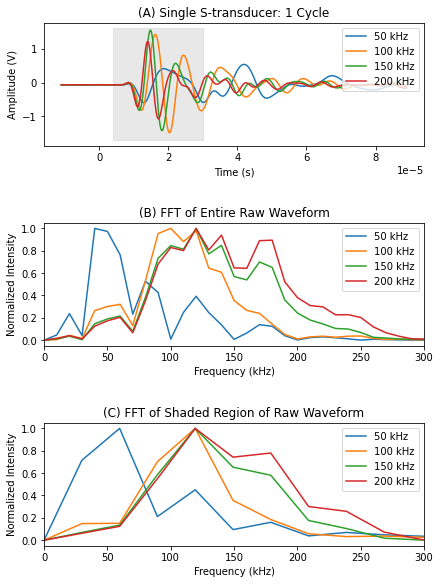

In [23]:

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))
y = np.arange(-1.7,1.7,0.1)

# plot time signal:
axs[0].set_title('(A) Single S-transducer: 1 Cycle')
axs[0].plot(S1_50.time,S1_50.data, label="50 kHz")
axs[0].plot(S1_100.time,S1_100.data, label="100 kHz")
axs[0].plot(S1_150.time,S1_150.data, label="150 kHz")
axs[0].plot(S1_200.time,S1_200.data, label="200 kHz")
axs[0].fill_betweenx(y, S1_200.time[300], S1_200.time[818], color='lightgrey', alpha=0.5)
#axs[0].vlines(S1_200.time[300],-1.7,1.7, color = 'r', linestyle = 'dashed')
#axs[0].vlines(S1_200.time[818],-1.7,1.7, color = 'r', linestyle = 'dashed')
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude (V)")
axs[0].legend(loc=1)
#axs[0].set_xlim([0, 6e-5])

# plot FFT of whole waves:
axs[1].plot(f_S1_50f,np.abs(FT_S1_50f)/max(np.abs(FT_S1_50f)),label='50 kHz')
axs[1].plot(f_S1_100f,np.abs(FT_S1_100f)/max(np.abs(FT_S1_100f)),label='100 kHz')
axs[1].plot(f_S1_150f,np.abs(FT_S1_150f)/max(np.abs(FT_S1_150f)),label='150 kHz')
axs[1].plot(f_S1_200f,np.abs(FT_S1_200f)/max(np.abs(FT_S1_200f)),label='200 kHz')
axs[1].set_title("(B) FFT of Entire Raw Waveform")
axs[1].set_xlabel("Frequency (kHz)")
axs[1].set_ylabel("Normalized Intensity")
axs[1].set_xlim([0, 300])
axs[1].legend(loc=1)

# plot FFT of crop waves:
axs[2].plot(f_S1_50c,np.abs(FT_S1_50c)/max(np.abs(FT_S1_50c)),label='50 kHz')
axs[2].plot(f_S1_100c,np.abs(FT_S1_100c)/max(np.abs(FT_S1_100c)),label='100 kHz')
axs[2].plot(f_S1_150c,np.abs(FT_S1_150c)/max(np.abs(FT_S1_150c)),label='150 kHz')
axs[2].plot(f_S1_200c,np.abs(FT_S1_200c)/max(np.abs(FT_S1_200c)),label='200 kHz')

axs[2].set_title("(C) FFT of Shaded Region of Raw Waveform")
axs[2].set_xlabel("Frequency (kHz)")
axs[2].set_ylabel("Normalized Intensity")
axs[2].set_xlim([0, 300])
axs[2].legend(loc=1)


fig.tight_layout(pad=0.3, w_pad=0.2,h_pad=3)
#fig.tight_layout()
plt.savefig('Figures/Single_Strans_1cycle.jpg', dpi=400)

In [199]:
len(f_S1_50c)/2

260.0

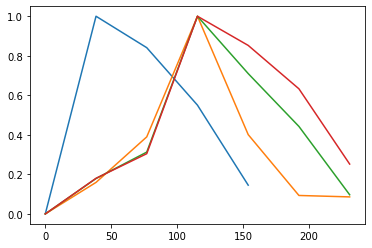

In [202]:
plt.plot(f_S1_50c[260:265],np.abs(FT_S1_50c[260:265])/max(np.abs(FT_S1_50c[260:265])),label='50 kHz')
plt.plot(f_S1_100c[260:267],np.abs(FT_S1_100c[260:267])/max(np.abs(FT_S1_100c[260:267])),label='100 kHz')
plt.plot(f_S1_150c[260:267],np.abs(FT_S1_150c[260:267])/max(np.abs(FT_S1_150c[260:267])),label='150 kHz')
plt.plot(f_S1_200c[260:267],np.abs(FT_S1_200c[260:267])/max(np.abs(FT_S1_200c[260:267])),label='200 kHz')


In [203]:
print('50kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S1_50c[260:265],np.abs(FT_S1_50c[260:265])/max(np.abs(FT_S1_50c[260:265])))
print('100kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f_S1_100c[260:267],np.abs(FT_S1_100c[260:267])/max(np.abs(FT_S1_100c[260:267])))
print('150kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f_S1_150c[260:267],np.abs(FT_S1_150c[260:267])/max(np.abs(FT_S1_150c[260:267])))
print('200 kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f_S1_200c[260:267],np.abs(FT_S1_200c[260:267])/max(np.abs(FT_S1_200c[260:267])))

50kHz
Peak Index: 43
Central Frequency: 66.82206682206746
FWHM: 91.68609168609257

100kHz
Peak Index: 50
Central Frequency: 116.55011655011766
FWHM: 72.26107226107297

150kHz
Peak Index: 57
Central Frequency: 132.86713286713413
FWHM: 104.8951048951059

200 kHz
Peak Index: 61
Central Frequency: 142.19114219114354
FWHM: 121.21212121212237



Text(0.5, 1.0, 'Single Transducer Testing - 1 Cycle')

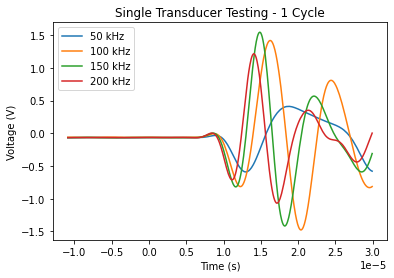

In [188]:
plt.plot(S1_50.time[0:818],S1_50.data[0:818], label="50 kHz")
plt.plot(S1_100.time[0:818],S1_100.data[0:818], label="100 kHz")
plt.plot(S1_150.time[0:818],S1_150.data[0:818], label="150 kHz")
plt.plot(S1_200.time[0:818],S1_200.data[0:818], label="200 kHz")
plt.legend()
#plt.xlim([0.75e-5,3e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title('Single Transducer Testing - 1 Cycle')

In [242]:
S1_150.time[918]

3.5e-05

Text(0.5, 0, 'Frequency (kHz)')

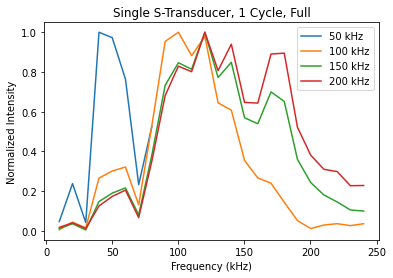

In [191]:
f_S1_50f,FT_S1_50f=myfft(S1_50.time,S1_50.data)
f_S1_100f,FT_S1_100f=myfft(S1_100.time,S1_100.data)
f_S1_150f,FT_S1_150f=myfft(S1_150.time,S1_150.data)
f_S1_200f,FT_S1_200f=myfft(S1_200.time,S1_200.data)
f_S1_200b,FT_S1_200bf=myfft(S1_200.time,S1_200.data)

plt.plot(f_S1_50f[1000:1008],np.abs(FT_S1_50f[1000:1008])/max(np.abs(FT_S1_50f[1000:1008])),label='50 kHz')
plt.plot(f_S1_100f[1000:1024],np.abs(FT_S1_100f[1000:1024])/max(np.abs(FT_S1_100f[1000:1024])),label='100 kHz')
plt.plot(f_S1_150f[1000:1024],np.abs(FT_S1_150f[1000:1024])/max(np.abs(FT_S1_150f[1000:1024])),label='150 kHz')
plt.plot(f_S1_200f[1000:1024],np.abs(FT_S1_200f[1000:1024])/max(np.abs(FT_S1_200f[1000:1024])),label='200 kHz')
#plt.plot(f_S1_200b,np.abs(FT_S1_200b)/max(np.abs(FT_S1_200b)),label='200b kHz')
plt.title('Single S-Transducer, 1 Cycle, Full')
#plt.xlim([0,300])
plt.legend()
plt.ylabel("Normalized Intensity")
plt.xlabel("Frequency (kHz)")
#plt.savefig('Figures/Laser_SingleTrans_S1_1cycle_FullFFT.jpeg', dpi=300)

In [196]:
print('50kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S1_50f[1000:1008],np.abs(FT_S1_50f[1000:1008])/max(np.abs(FT_S1_50f[1000:1008])))
print('100kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f_S1_100f[1000:1024],np.abs(FT_S1_100f[1000:1024])/max(np.abs(FT_S1_100f[1000:1024])))
print('150kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f_S1_150f[1000:1024],np.abs(FT_S1_150f[1000:1024])/max(np.abs(FT_S1_150f[1000:1024])))
print('200 kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f_S1_200f[1000:1024],np.abs(FT_S1_200f[1000:1024])/max(np.abs(FT_S1_200f[1000:1024])))

50kHz
Peak Index: 57
Central Frequency: 50.3533836867175
FWHM: 33.97336730670096

100kHz
Peak Index: 43
Central Frequency: 110.00899889788884
FWHM: 74.4178521956307

150kHz
Peak Index: 52
Central Frequency: 130.93901982791
FWHM: 106.97566253121911

200 kHz
Peak Index: 56
Central Frequency: 140.2412513523638
FWHM: 118.60345193678641



In [252]:
# Frequency at peak (Hz):
print(f_S1_50f[np.argmax(np.abs(FT_S1_50f))])
print(f_S1_100f[np.argmax(np.abs(FT_S1_100f))])
print(f_S1_150f[np.argmax(np.abs(FT_S1_150f))])
print(f_S1_200f[np.argmax(np.abs(FT_S1_200f))])

-40.040040040040424
-100.10010010010105
-120.12012012012127
120.12012012012127


In [253]:
print(f_S1_50f[1]-f_S1_50f[0])
print(f_S1_100f[1]-f_S1_100f[0])
print(f_S1_150f[1]-f_S1_150f[0])
print(f_S1_200f[1]-f_S1_200f[0])

10.010010010009864
10.010010010009864
10.010010010009864
10.010010010009864


Text(0.5, 0, 'Frequency (kHz)')

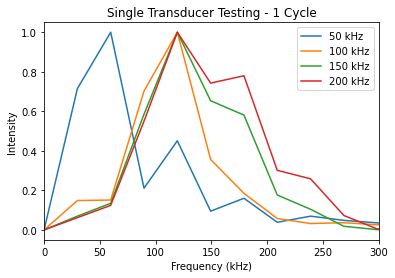

In [22]:
f_S1_50c,FT_S1_50c=myfft(S1_50.time[248:918],S1_50.data[248:918])
f_S1_100c,FT_S1_100c=myfft(S1_100.time[248:918],S1_100.data[248:918])
f_S1_150c,FT_S1_150c=myfft(S1_150.time[248:918],S1_150.data[248:918])
f_S1_200c,FT_S1_200c=myfft(S1_200.time[248:918],S1_200.data[248:918])

plt.plot(f_S1_50c,np.abs(FT_S1_50c)/max(np.abs(FT_S1_50c)),label='50 kHz')
plt.plot(f_S1_100c,np.abs(FT_S1_100c)/max(np.abs(FT_S1_100c)),label='100 kHz')
plt.plot(f_S1_150c,np.abs(FT_S1_150c)/max(np.abs(FT_S1_150c)),label='150 kHz')
plt.plot(f_S1_200c,np.abs(FT_S1_200c)/max(np.abs(FT_S1_200c)),label='200 kHz')
#plt.plot(f_S1_200b,np.abs(FT_S1_200b)/max(np.abs(FT_S1_200b)),label='200b kHz')
plt.title('Single Transducer Testing - 1 Cycle')
plt.xlim([0,300])
plt.legend()
plt.ylabel("Intensity")
plt.xlabel("Frequency (kHz)")


In [255]:
# Frequency at peak (Hz):
print(f_S1_50c[np.argmax(np.abs(FT_S1_50c))])
print(f_S1_100c[np.argmax(np.abs(FT_S1_100c))])
print(f_S1_150c[np.argmax(np.abs(FT_S1_150c))])
print(f_S1_200c[np.argmax(np.abs(FT_S1_200c))])

-59.70149253731349
119.40298507462698
-119.40298507462698
-119.40298507462698


In [256]:
print(f_S1_50c[1]-f_S1_50c[0])
print(f_S1_100c[1]-f_S1_50c[0])
print(f_S1_150c[1]-f_S1_150c[0])
print(f_S1_200c[1]-f_S1_200c[0])

29.85074626865753
29.85074626865753
29.85074626865753
29.85074626865753


In [191]:
t=0.5e-5
f=1/t
print(f/1000)

199.99999999999997


In [46]:
t=1e-5
f=1/t
print(f/1000)

99.99999999999999


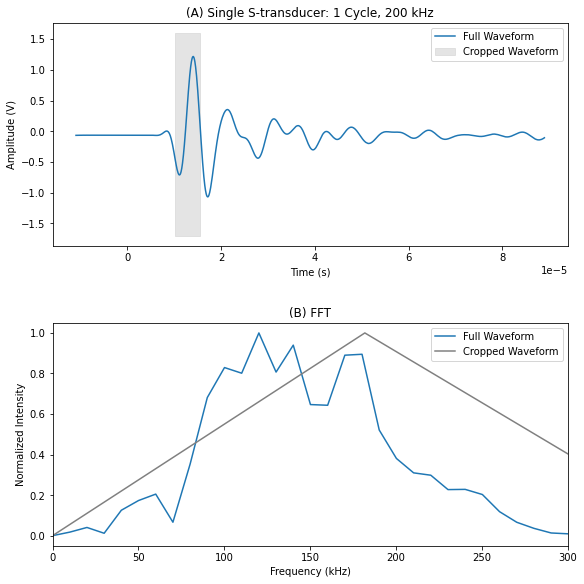

In [60]:
f_S1_200c,FT_S1_200c=myfft(S1_200.time[420:530],S1_200.data[420:530])

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
y = np.arange(-1.7,1.7,0.1)

# plot time signal:
axs[0].set_title('(A) Single S-transducer: 1 Cycle, 200 kHz')

axs[0].plot(S1_200.time,S1_200.data, label="Full Waveform")
axs[0].fill_betweenx(y, S1_200.time[420], S1_200.time[530], color='lightgrey', alpha=0.6, label="Cropped Waveform")
#axs[0].vlines(S1_200.time[420],-1.7,1.7, color = 'r', linestyle = 'dashed', label="Cropped Waveform")
#axs[0].vlines(S1_200.time[530],-1.7,1.7, color = 'r', linestyle = 'dashed')
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude (V)")
axs[0].legend(loc=1)
#axs[0].set_xlim([0, 6e-5])

# plot FFTs:
axs[1].plot(f_S1_200f,np.abs(FT_S1_200f)/max(np.abs(FT_S1_200f)),label="Full Waveform")
axs[1].plot(f_S1_200c,np.abs(FT_S1_200c)/max(np.abs(FT_S1_200c)),'grey',label="Cropped Waveform")

axs[1].set_title("(B) FFT")
axs[1].set_xlabel("Frequency (kHz)")
axs[1].set_ylabel("Normalized Intensity")
axs[1].set_xlim([0, 300])
axs[1].legend(loc=1)



fig.tight_layout(pad=0.3, w_pad=0.2,h_pad=3)
#fig.tight_layout()
plt.savefig('Figures/cut_fft.jpg', dpi=400)

In [46]:
print(f_S1_200c[np.argmax(np.abs(FT_S1_200c))])
print(f_S1_200f[np.argmax(np.abs(FT_S1_200f))])

-181.81818181817738
120.12012012012127


Two very real limitation in this study:
1) first and formost, the resolution of the FFT is a major limitation in this study. With peaks spanning several hundred kilohertz, it is difficult to accurately measure the frequency of the waves. These values have been checked by manually pin-pointing the period of a single cycle, however this process is subjective (its difficult to say with certainty where a wave begins and ends, especially when the waveform is distroted by the medium).
2) the method used to test independant transducers does not operate in the same frequency range as the transducers themselves. The probe transducers used here are 1 MHz transducers (high frequency range), whereas the laser vibrometer does not detect frequencies about 300 kHz. Therefore, we are forced to examine the frequency of waves in the suboptimal range for these transducers. 